## 볼록 껍질(Convex Hull)
- 2차원 평면 상에 점이 여러개가 있을 때, 이중 일부를 골라 나머지 점들을 모두 포함하는 볼록 다각형을 구하는 것
- 포함한다는 말은 점이 다각형의 경계에 걸쳐있는 것도 인정한다.
  - 따라서 변 위에 점이 있어도 된다.
- 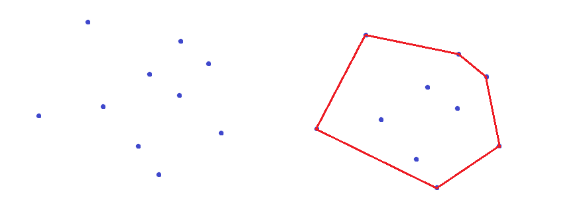
  - 여기서 볼록 껍질에 속한 점의 개수는 6개이다.

### 그라함 스캔(Graham scan)
- 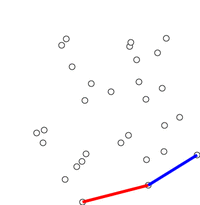 \
(그라함 스캔 데모)
- 스택을 이용해 정렬된 점들을 살피면서, 나머지 점들이 시계방향/반시계방향으로 놓여있는지 확인하여 볼록 껍질을 구하는 방법
1. 점들을 정렬한다(구현에서는 Python의 sort 즉 맨 앞 키(p[0])가 낮은 순 -> 그 다음 키(p[1])가 낮은 순...)
2. 스택의 크기가 2 이상일 때 다음을 확인한다.
    - 스택의 가장 위에 있는 점을 `A`, 그 다음 점을 `B`, 그리고 확인할 점을 `C`라고 할 때,
      - 벡터 $\overrightarrow{AC}$ 기준에서 `B`가 시계 방향에 존재하거나,
      - 벡터 $\overrightarrow{AC}$ 사이에 `B`가 존재한다면
    - 스택의 가장 위에 있는 점`B`를 pop한다.
3. 스택 안에 현재 볼 점 `C`를 스택에 넣는다.
- 이때 벡터 $\overrightarrow{AC}$와 `B`의 방향성은 CCW, 즉 벡터의 외적으로 확인한다.

In [ ]:
def remove_middle(a, b, c): #AC를 그었을 때 B가 시계 방향에 존재하거나, ABC가 평행한데 B가 A와 C 사이에 존재하면 제거
  cross = (a[0] - b[0]) * (c[1] - b[1]) - (a[1] - b[1]) * (c[0] - b[0])
  dot = (a[0] - b[0]) * (c[0] - b[0]) + (a[1] - b[1]) * (c[1] - b[1]) #list를 뒤집은 것을 붙이기 때문에 내적을 확인해서 처리해줘야 한다.
  return cross < 0 or cross == 0 and dot <= 0


def convex_hull(points):
  spoints = sorted(points)
  hull = []
  for p in spoints + spoints[::-1]:
    while len(hull) >= 2 and remove_middle(hull[-2], hull[-1], p):
      hull.pop()
    hull.append(p)
  hull.pop()
  return hull

In [ ]:
def check(a, b, c):
  c = (a[0] - b[0]) * (c[1] - b[1]) - (a[1] - b[1]) * (c[0] - b[0])
  d = (a[0] - b[0]) * (c[0] - b[0]) + (a[1] - b[1]) * (c[1] - b[1])
  return c < 0 or c == 0 and d <= 0

def ch(points):
  P = sorted(points)
  S = []
  for p in P + P[::-1]:
    while len(S) >= 2 and check(S[-2], S[-1], p):
      S.pop()
    S.append(p)
  S.pop()
  return S